In [509]:
df_germany = pd.read_excel(
    '/Users/bastianchuttarsing/Documents/Data-Vizualisation/archive/Germany.xlsx',
    sheet_name='Germany by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')
df_germany = df_germany.drop_duplicates(subset=['OdName'])
df_germany.head()

Data read into a pandas dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,585,...,1908,1700,1615,1184,1510,..,..,..,..,..
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1059,864,735,683,829,..,..,..,..,..
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,842,...,2373,1730,1420,1312,1352,..,..,..,..,..
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,6,3,1,4,1,..,..,..,..,..
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,452,456,372,464,441,..,..,..,..,..


In [510]:
df_germany.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_germany.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,585,844,1336,859,522,442,...,1908,1700,1615,1184,1510,..,..,..,..,..
1,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1059,864,735,683,829,..,..,..,..,..
2,Algeria,Africa,Northern Africa,Developing regions,842,636,584,676,546,618,...,2373,1730,1420,1312,1352,..,..,..,..,..
3,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,6,3,1,4,1,..,..,..,..,..
4,Angola,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,...,452,456,372,464,441,..,..,..,..,..


In [511]:
df_germany=df_germany.replace("..", 0)

In [512]:
df_germany['Total'] = df_germany.sum(axis=1)

/var/folders/1r/8rym71sj2cq1cz996pm7qd9h0000gn/T/ipykernel_5257/500708782.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_germany['Total'] = df_germany.sum(axis=1)


In [513]:
df_germany.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

In [514]:
df_germany.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [515]:
df_germany.set_index('Country', inplace=True)


In [516]:
df_germany.sort_values(['Total'], ascending = False, axis =0, inplace=True)
df_germany.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,World,World,World,395024,426058,446041,443666,564819,389114,373871,...,628399,639064,636854,737889,0,0,0,0,0,16586536
Germany,Europe,Western Europe,Developed regions,53728,55001,60227,62305,59764,58607,59350,...,144815,155290,161105,174759,0,0,0,0,0,3081093
Poland,Europe,Eastern Europe,Developed regions,27927,49021,34120,36333,52859,57911,62686,...,98190,107569,113791,119649,0,0,0,0,0,2274307
Turkey,Asia,Western Asia,Developing regions,71444,71615,87579,100977,213891,61017,52444,...,34466,32424,29879,34843,0,0,0,0,0,1496872
Unknown,World,World,World,214,270,279,272,308,805,1445,...,34612,29733,17859,22610,0,0,0,0,0,1201586


In [517]:
years= list(map(int, range(1980,2013)))
df_germany.loc['Poland', years]

1980     27927
1981     49021
1982     34120
1983     36333
1984     52859
1985     57911
1986     62686
1987     71263
1988    100294
1989    148581
1990    163606
1991    117195
1992    110056
1993    101904
1994     66037
1995     71001
1996     71824
1997     70180
1998     60778
1999     59352
2000         0
2001     64262
2002     67907
2003     73666
2004     96345
2005     98190
2006    107569
2007    113791
2008    119649
2009         0
2010         0
2011         0
2012         0
Name: Poland, dtype: object

Text(0.5, 1.0, 'Immigration from Poland')

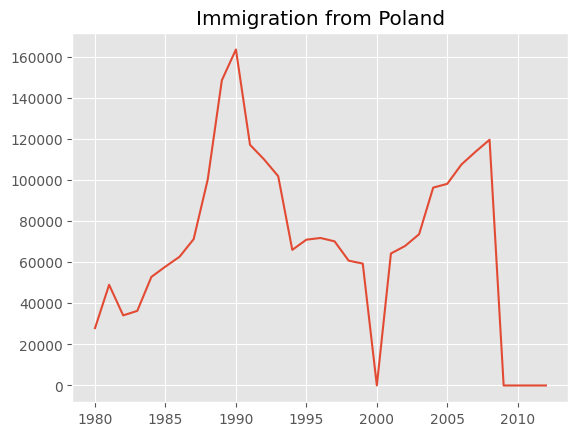

In [518]:
df_germany.loc['Poland', years].plot(kind='line')
plt.title('Immigration from Poland')

In [519]:
df_top5=df_germany.head()
df_top5 = df_top5.drop(['Total'])

In [520]:
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,Germany,Poland,Turkey,Unknown
1980,53728,27927,71444,214
1981,55001,49021,71615,270
1982,60227,34120,87579,279
1983,62305,36333,100977,272
1984,59764,52859,213891,308


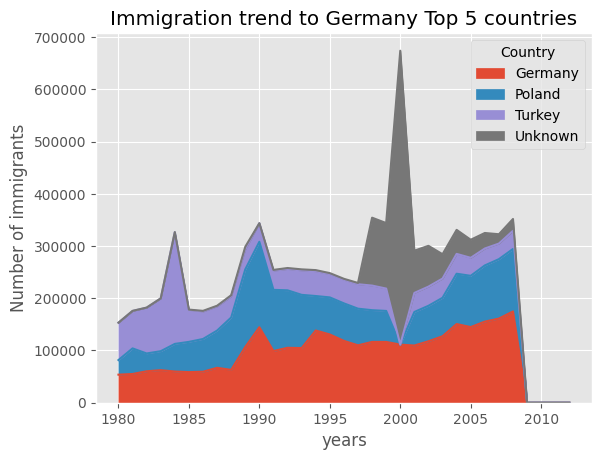

In [521]:
df_top5.plot(kind='area')
plt.title('Immigration trend to Germany Top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('years')
plt.show()

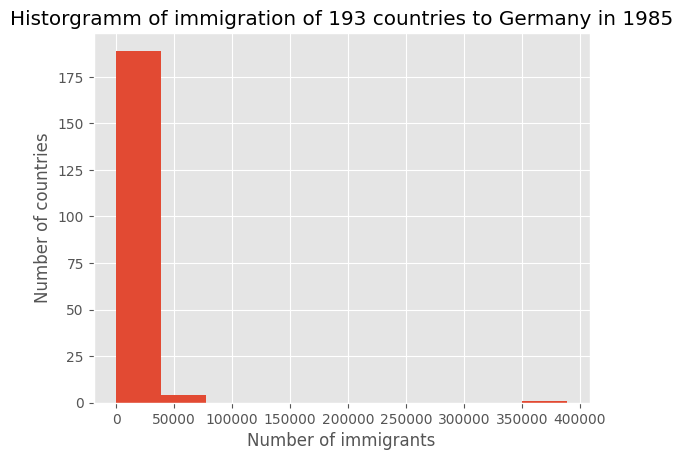

In [522]:
df_germany[1985].plot(kind='hist')
plt.title('Historgramm of immigration of 193 countries to Germany in 1985')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')
plt.show()

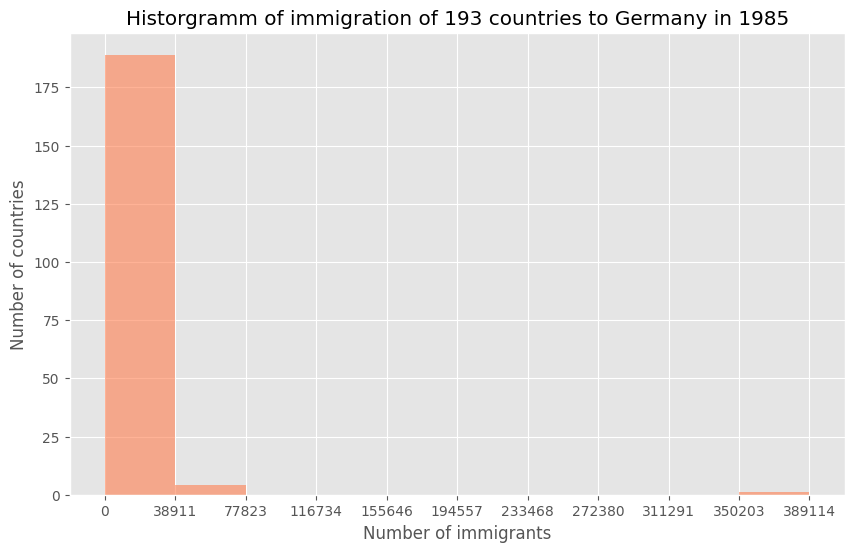

In [523]:
import numpy as np
count, bin_edges = np.histogram(df_germany[1985])

df_germany[1985].plot(kind ='hist', 
          figsize=(10, 6),
          bins=10,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.title('Historgramm of immigration of 193 countries to Germany in 1985')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')
plt.show()

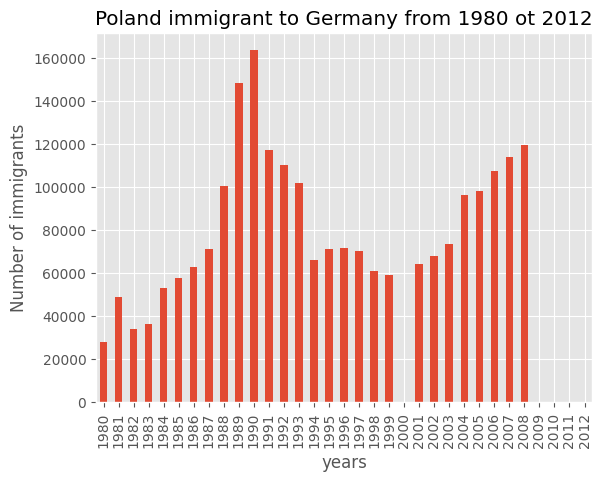

In [524]:
df_germany.loc['Poland', years].plot(kind='bar')
plt.title('Poland immigrant to Germany from 1980 ot 2012')
plt.ylabel('Number of immigrants')
plt.xlabel('years')
plt.show()

In [525]:
df_continents = df_germany.groupby('Continent', axis=0).sum()
df_continents.head()

/var/folders/1r/8rym71sj2cq1cz996pm7qd9h0000gn/T/ipykernel_5257/3547176073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_germany.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,9380,10034,12425,13839,16481,13919,13944,12469,11971,11226,...,21075,19233,17011,19692,0,0,0,0,0,498097
Asia,97796,101717,125316,139056,247317,102581,95826,83401,75049,76025,...,101017,100913,95338,110039,0,0,0,0,0,2857698
Europe,270253,295403,288460,272497,281873,254777,245390,257134,286728,397236,...,454157,471591,488922,559618,0,0,0,0,0,11529096
Latin America and the Caribbean,4228,4733,5702,5277,5498,4686,4729,4433,4602,4924,...,10827,11285,11747,15261,0,0,0,0,0,191406
Northern America,13468,14455,14348,13526,14212,14420,15447,14549,13679,13904,...,16571,17215,17355,21975,0,0,0,0,0,443621


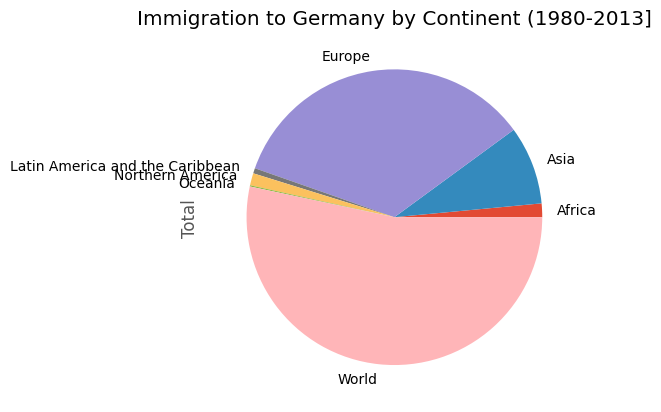

In [526]:
df_continents['Total'].plot(kind='pie')
plt.title('Immigration to Germany by Continent (1980-2013]')
plt.show()

In [527]:
df_japan = df_germany.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,2999
1981,3241
1982,3360
1983,3426
1984,3548


Text(0, 0.5, 'number of immigrants')

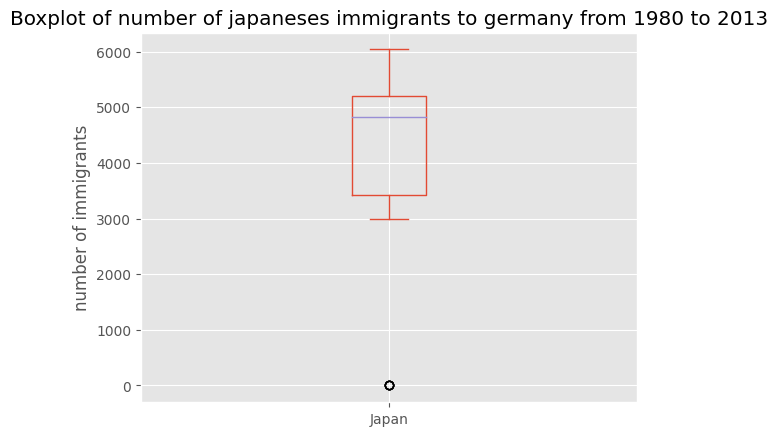

In [528]:
df_japan.plot(kind='box')
plt.title('Boxplot of number of japaneses immigrants to germany from 1980 to 2013')
plt.ylabel('number of immigrants')

In [529]:
df_total = df_germany.loc[['Total'], years].transpose()

df_total.index = map(int, df_total.index)
# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,395024
1,1981,426058
2,1982,446041
3,1983,443666
4,1984,564819


Text(0, 0.5, 'Number of Immigrants')

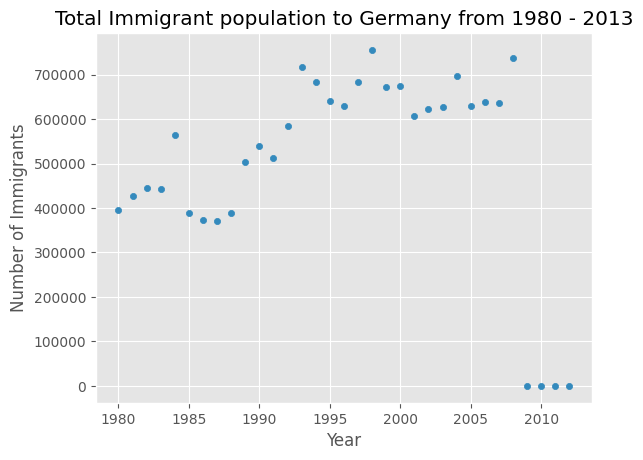

In [531]:
df_total.plot(kind='scatter',
             x='year',
             y='total')

plt.title( 'Total Immigrant population to Germany from 1980 - 2013')
plt.xlabel ('Year')
plt.ylabel ( 'Number of Immigrants')

ValueError: x and y must be the same size

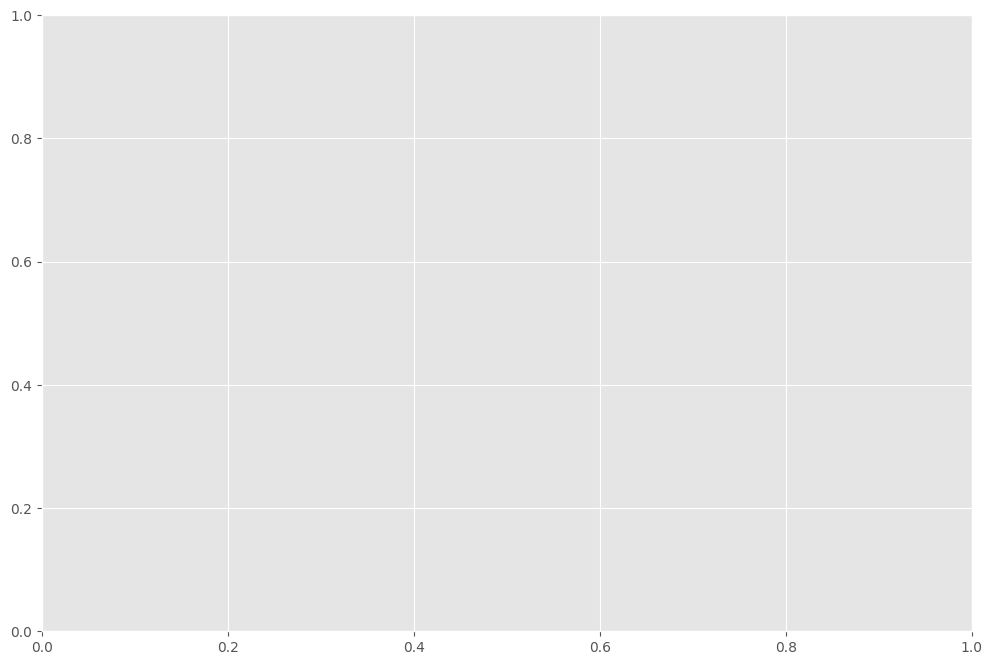

In [538]:
germany = df_total

i_normal = germany / germany.max()

plt.figure(figsize=(12, 8))
plt.scatter(years, df_total, 
                  color='darkblue', 
                 alpha=0.5,
                 s = i_normal * 2000)

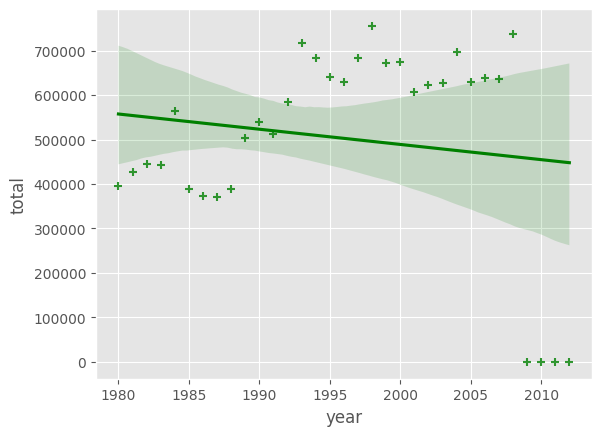

In [535]:
import seaborn as sns
ax = sns.regplot (x= 'year', y= 'total', data=df_total, color='green', marker='+')